In [1]:
from qiskit import QuantumCircuit
import math
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning) # setting ignore as a parameter and further adding category
import revlibparser
# import sys
# import os
# sys.path.append(os.path.abspath("/Users/anikeshparashar/revlib-to-qiskit"))
# from revlib2qiskit import *

In [2]:
qc = QuantumCircuit(5)

qc.cx(3,0)
qc.cx(4,1)
qc.cx(0,2)
qc.cx(1,0)
qc.cx(0,3)
qc.cx(3,2)
qc.cx(3,1)
qc.cx(0,1)
qc.cx(0,4)
qc.cx(4,3)

# qc = revlibparser.read_circuit("./reals/3_17_15.real")

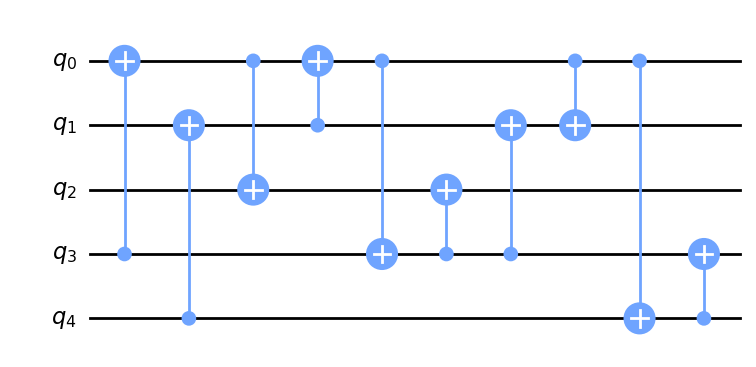

In [3]:
qc.draw(output = "mpl")

In [4]:
qc.num_qubits

5

In [5]:
index = {}
ind = 0
for i in qc.qubits:
    index[i] = ind
    ind += 1

In [6]:
index

{Qubit(QuantumRegister(5, 'q'), 0): 0,
 Qubit(QuantumRegister(5, 'q'), 1): 1,
 Qubit(QuantumRegister(5, 'q'), 2): 2,
 Qubit(QuantumRegister(5, 'q'), 3): 3,
 Qubit(QuantumRegister(5, 'q'), 4): 4}

In [7]:
qc.data

[CircuitInstruction(operation=Instruction(name='cx', num_qubits=2, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(5, 'q'), 3), Qubit(QuantumRegister(5, 'q'), 0)), clbits=()), CircuitInstruction(operation=Instruction(name='cx', num_qubits=2, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(5, 'q'), 4), Qubit(QuantumRegister(5, 'q'), 1)), clbits=()), CircuitInstruction(operation=Instruction(name='cx', num_qubits=2, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(5, 'q'), 0), Qubit(QuantumRegister(5, 'q'), 2)), clbits=()), CircuitInstruction(operation=Instruction(name='cx', num_qubits=2, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(5, 'q'), 1), Qubit(QuantumRegister(5, 'q'), 0)), clbits=()), CircuitInstruction(operation=Instruction(name='cx', num_qubits=2, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(5, 'q'), 0), Qubit(QuantumRegister(5, 'q'), 3)), clbits=()), CircuitInstruction(operation=Instruction(name='cx', num_qubits=2, num_clbits=0, para

In [8]:
for gate in qc.data:
    print('\ngate name:', gate[0].name)
    print('qubit(s) acted on:', gate[1])
    print('other paramters (such as angles):', gate[0].params)


gate name: cx
qubit(s) acted on: [Qubit(QuantumRegister(5, 'q'), 3), Qubit(QuantumRegister(5, 'q'), 0)]
other paramters (such as angles): []

gate name: cx
qubit(s) acted on: [Qubit(QuantumRegister(5, 'q'), 4), Qubit(QuantumRegister(5, 'q'), 1)]
other paramters (such as angles): []

gate name: cx
qubit(s) acted on: [Qubit(QuantumRegister(5, 'q'), 0), Qubit(QuantumRegister(5, 'q'), 2)]
other paramters (such as angles): []

gate name: cx
qubit(s) acted on: [Qubit(QuantumRegister(5, 'q'), 1), Qubit(QuantumRegister(5, 'q'), 0)]
other paramters (such as angles): []

gate name: cx
qubit(s) acted on: [Qubit(QuantumRegister(5, 'q'), 0), Qubit(QuantumRegister(5, 'q'), 3)]
other paramters (such as angles): []

gate name: cx
qubit(s) acted on: [Qubit(QuantumRegister(5, 'q'), 3), Qubit(QuantumRegister(5, 'q'), 2)]
other paramters (such as angles): []

gate name: cx
qubit(s) acted on: [Qubit(QuantumRegister(5, 'q'), 3), Qubit(QuantumRegister(5, 'q'), 1)]
other paramters (such as angles): []

gate 

In [9]:
gate[1][0]

Qubit(QuantumRegister(5, 'q'), 4)

In [10]:
costing = [[None for i in range(5)] for j in range(len(qc.qubits))]

for i in range(len(qc.qubits)):
    costing[i][0] = qc.qubits[i]
    costing[i][1] = []
    costing[i][3] = []
    
time = 0
for gate in qc.data:
    if len(gate[1]) == 1:
        continue
    time = time+1
    costing[index[gate[1][0]]][1].append(time)
    costing[index[gate[1][1]]][1].append(time)
    if math.fabs(index[gate[1][0]]-index[gate[1][1]])!=1:
        costing[index[gate[1][0]]][3].append(time)
        costing[index[gate[1][1]]][3].append(time)

for i in range(len(qc.qubits)):
    costing[i][2] = sum(costing[i][1])
    costing[i][4] = sum(costing[i][3])

In [11]:
costing

[[Qubit(QuantumRegister(5, 'q'), 0), [1, 3, 4, 5, 8, 9], 30, [1, 3, 5, 9], 18],
 [Qubit(QuantumRegister(5, 'q'), 1), [2, 4, 7, 8], 21, [2, 7], 9],
 [Qubit(QuantumRegister(5, 'q'), 2), [3, 6], 9, [3], 3],
 [Qubit(QuantumRegister(5, 'q'), 3), [1, 5, 6, 7, 10], 29, [1, 5, 7], 13],
 [Qubit(QuantumRegister(5, 'q'), 4), [2, 9, 10], 21, [2, 9], 11]]

In [12]:
pref_table =[]
for i in costing:
    pref_table.append([])
    pref_table[-1].extend([i[0],i[2],i[4],i[4]/i[2]])

In [13]:
pref_table

[[Qubit(QuantumRegister(5, 'q'), 0), 30, 18, 0.6],
 [Qubit(QuantumRegister(5, 'q'), 1), 21, 9, 0.42857142857142855],
 [Qubit(QuantumRegister(5, 'q'), 2), 9, 3, 0.3333333333333333],
 [Qubit(QuantumRegister(5, 'q'), 3), 29, 13, 0.4482758620689655],
 [Qubit(QuantumRegister(5, 'q'), 4), 21, 11, 0.5238095238095238]]

In [14]:
def Sort(List):
    List.sort(reverse = True, key=lambda l: l[3])
    return List

sorted_pref_table = Sort(pref_table)

In [15]:
sorted_pref_table

[[Qubit(QuantumRegister(5, 'q'), 0), 30, 18, 0.6],
 [Qubit(QuantumRegister(5, 'q'), 4), 21, 11, 0.5238095238095238],
 [Qubit(QuantumRegister(5, 'q'), 3), 29, 13, 0.4482758620689655],
 [Qubit(QuantumRegister(5, 'q'), 1), 21, 9, 0.42857142857142855],
 [Qubit(QuantumRegister(5, 'q'), 2), 9, 3, 0.3333333333333333]]

In [16]:
# lattice_size1 = lattice_size2 = math.ceil(math.sqrt(len(index)))
lattice_size1 = lattice_size2 = 3

In [17]:
lattice_size1, lattice_size2

(3, 3)

In [18]:
grid_struct = [[None for i in range(lattice_size2)] for j in range(lattice_size1)]

In [19]:
grid_struct[1][0] = 'X'

In [20]:
grid_struct[2][0] = 'X'

In [21]:
grid_struct[1][2] = 'X'

In [22]:
grid_struct[2][2] = 'X'

In [23]:
def count_emp_neigh(grid_struct, i, j, M, N):
    count = 0
    if i>0 and grid_struct[i-1][j] is None:
        count = count+1
    if j>0 and grid_struct[i][j-1] is None:
        count = count+1
    if i<M-1 and grid_struct[i+1][j] is None:
        count = count+1
    if j<N-1 and grid_struct[i][j+1] is None:
        count = count+1
    return count

In [24]:
def max_emp_neigh(grid_struct, M, N):
    max = 0
    loc = [[]]
    for i in range(M):
        for j in range(N):
            if count_emp_neigh(grid_struct, i, j, M, N) > max and grid_struct[i][j] is None:
                max = count_emp_neigh(grid_struct, i, j, M, N)
                loc=[[i,j]]
            elif count_emp_neigh(grid_struct, i, j, M, N) == max and grid_struct[i][j] is None:
                loc.append([i,j])
    return loc

In [25]:
def sum_par(i):
    return i[0]+i[1]

In [26]:
center_point = max_emp_neigh(grid_struct, lattice_size1, lattice_size2)
center_point.sort(key = sum_par)

In [27]:
center_point

[[0, 1]]

In [28]:
count = 1
prev=[None, None]
for q_dat in sorted_pref_table:
    if count==1:
        grid_struct[center_point[int(len(center_point)/2)][0]][center_point[int(len(center_point)/2)][1]] = q_dat[0]
        prev[0] = center_point[int(len(center_point)/2)][0]
        prev[1] = center_point[int(len(center_point)/2)][1]
        count = count+1
    else:
        loc = max_emp_neigh(grid_struct, lattice_size1, lattice_size2)
        if len(loc) == 1:
            grid_struct[loc[0][0]][loc[0][1]] = q_dat[0]
            prev[0] = loc[0][0]
            prev[1] = loc[0][1]
        else:
            i, j = prev
            assigned = False
            for a in [-1, 1, -2, 2]:
                if 0<=j+a<=lattice_size2-1 and grid_struct[i][j+a] is None:
                    grid_struct[i][j+a] = q_dat[0]
                    assigned = True
                    break
                if 0<=i+a<=lattice_size1-1 and grid_struct[i+a][j] is None:
                    grid_struct[i+a][j] = q_dat[0]
                    assigned = True
                    break
            if not assigned:    
                for a in range(0, lattice_size1):
                    for b in range(0, lattice_size2):
                        if 0<=i+a<=lattice_size1-1 and 0<=j+b<=lattice_size2-1 and grid_struct[i+a][j+b] is None:
                            grid_struct[i+a][j+b] = q_dat[0]
                            assigned = True
                            break
                        if 0<=i+a<=lattice_size1-1 and 0<=j-b<=lattice_size2-1 and grid_struct[i+a][j-b] is None:
                            grid_struct[i+a][j-b] = q_dat[0]
                            assigned = True
                            break
                        if 0<=i-a<=lattice_size1-1 and 0<=j+b<=lattice_size2-1 and grid_struct[i-a][j+b] is None:
                            grid_struct[i-a][j+b] = q_dat[0]
                            assigned = True
                            break
                        if 0<=i-a<=lattice_size1-1 and 0<=j-b<=lattice_size2-1 and grid_struct[i-a][j-b] is None:
                            grid_struct[i-a][j-b] = q_dat[0]
                            assigned = True
                            break
                    if (assigned):
                        break

In [29]:
grid_struct

[[Qubit(QuantumRegister(5, 'q'), 4),
  Qubit(QuantumRegister(5, 'q'), 0),
  Qubit(QuantumRegister(5, 'q'), 3)],
 ['X', Qubit(QuantumRegister(5, 'q'), 1), 'X'],
 ['X', Qubit(QuantumRegister(5, 'q'), 2), 'X']]

In [30]:
import copy
intial_grid_struct = copy.deepcopy(grid_struct)

In [31]:
dict = {}
for i in range(lattice_size1):
    for j in range(lattice_size2):
        if grid_struct[i][j] is not None:
            dict[grid_struct[i][j]] = [i, j]

In [32]:
dict

{Qubit(QuantumRegister(5, 'q'), 4): [0, 0],
 Qubit(QuantumRegister(5, 'q'), 0): [0, 1],
 Qubit(QuantumRegister(5, 'q'), 3): [0, 2],
 'X': [2, 2],
 Qubit(QuantumRegister(5, 'q'), 1): [1, 1],
 Qubit(QuantumRegister(5, 'q'), 2): [2, 1]}

In [33]:
def print_gs(grid_struct):
    for i in range(len(grid_struct)):
        for j in range(len(grid_struct[0])):
            if grid_struct[i][j] is None:
                print(' ', end=' ')
            elif grid_struct[i][j] == 'X':
                print(grid_struct[i][j], end=' ')
            else:
                print(index[grid_struct[i][j]], end=' ')
        print()

In [34]:
print_gs(grid_struct)
swap_count = 0
print()
for gate in qc.data:
    if len(gate[1]) == 1:
        print("no swap")
        print_gs(grid_struct)
        print()
#         print("Gate achieved: ",gate[0].name, index[gate[1][0]])
        print()
        continue
    l1_x, l1_y = dict[gate[1][0]]
    l2_x, l2_y = dict[gate[1][1]]
    
    if ((l1_x == l2_x) and (math.fabs(l1_y - l2_y) == 1)) or ((l1_y == l2_y) and (math.fabs(l1_x - l2_x) == 1)):
        print("no swap")
        print_gs(grid_struct)
        print()
#         print("Gate achieved: ",gate[0].name, index[gate[1][0]], index[gate[1][1]])
        print()
    else:
        dx = l1_x - l2_x
        dy = l1_y - l2_y
        dirchange = ""
        while (math.fabs(dx) + math.fabs(dy) != 1):
            if dx > 0 and grid_struct[l1_x - 1][l1_y] != 'X':
                grid_struct[l1_x - 1][l1_y], grid_struct[l1_x][l1_y] = grid_struct[l1_x][l1_y], grid_struct[l1_x - 1][l1_y]
                dict[grid_struct[l1_x - 1][l1_y]] = [l1_x - 1, l1_y]
                dict[grid_struct[l1_x][l1_y]] = [l1_x, l1_y]
            elif dx > 0 and grid_struct[l2_x + 1][l2_y] != 'X':
                grid_struct[l2_x + 1][l2_y], grid_struct[l2_x][l2_y] = grid_struct[l2_x][l2_y], grid_struct[l2_x + 1][l2_y]
                dict[grid_struct[l2_x + 1][l2_y]] = [l2_x + 1, l2_y]
                dict[grid_struct[l2_x][l2_y]] = [l2_x, l2_y]
            elif dx < 0 and grid_struct[l1_x + 1][l1_y] != 'X':
                grid_struct[l1_x + 1][l1_y], grid_struct[l1_x][l1_y] = grid_struct[l1_x][l1_y], grid_struct[l1_x + 1][l1_y]
                dict[grid_struct[l1_x + 1][l1_y]] = [l1_x + 1, l1_y]
                dict[grid_struct[l1_x][l1_y]] = [l1_x, l1_y]
            elif dx < 0 and grid_struct[l2_x - 1][l2_y] != 'X':
                grid_struct[l2_x - 1][l2_y], grid_struct[l2_x][l2_y] = grid_struct[l2_x][l2_y], grid_struct[l2_x - 1][l2_y]
                dict[grid_struct[l2_x - 1][l2_y]] = [l2_x - 1, l2_y]
                dict[grid_struct[l2_x][l2_y]] = [l2_x, l2_y]
            elif dy > 0 and grid_struct[l1_x][l1_y - 1] != 'X':
                grid_struct[l1_x][l1_y - 1], grid_struct[l1_x][l1_y] = grid_struct[l1_x][l1_y], grid_struct[l1_x][l1_y - 1]
                dict[grid_struct[l1_x][l1_y - 1]] = [l1_x, l1_y - 1]
                dict[grid_struct[l1_x][l1_y]] = [l1_x, l1_y]
            elif dy > 0 and grid_struct[l2_x][l2_y + 1] != 'X':
                grid_struct[l2_x][l2_y + 1], grid_struct[l2_x][l2_y] = grid_struct[l2_x][l2_y], grid_struct[l2_x][l2_y + 1]
                dict[grid_struct[l2_x][l2_y + 1]] = [l2_x, l2_y + 1]
                dict[grid_struct[l2_x][l2_y]] = [l2_x, l2_y]
            elif dy < 0 and grid_struct[l1_x][l1_y + 1] != 'X':
                grid_struct[l1_x][l1_y + 1], grid_struct[l1_x][l1_y] = grid_struct[l1_x][l1_y], grid_struct[l1_x][l1_y + 1]
                dict[grid_struct[l1_x][l1_y + 1]] = [l1_x, l1_y + 1]
                dict[grid_struct[l1_x][l1_y]] = [l1_x, l1_y]
            elif dy < 0 and grid_struct[l2_x][l2_y - 1] != 'X':
                grid_struct[l2_x][l2_y - 1], grid_struct[l2_x][l2_y] = grid_struct[l2_x][l2_y], grid_struct[l2_x][l2_y - 1]
                dict[grid_struct[l2_x][l2_y - 1]] = [l2_x, l2_y - 1]
                dict[grid_struct[l2_x][l2_y]] = [l2_x, l2_y]
            else:
               # sleep(1)
                if dx == 0 and 'X' in [grid_struct[l2_x][i] for i in range(l1_y, l2_y, -int(dy/math.fabs(dy)))]:
                    # print(111)
                    if dirchange!="-x" and (l1_x+1 < lattice_size1 and grid_struct[l1_x+1][l1_y] != 'X' and grid_struct[l2_x+1][l2_y] !='X'):
                        grid_struct[l1_x + 1][l1_y], grid_struct[l1_x][l1_y] = grid_struct[l1_x][l1_y], grid_struct[l1_x + 1][l1_y]
                        dict[grid_struct[l1_x + 1][l1_y]] = [l1_x + 1, l1_y]
                        dict[grid_struct[l1_x][l1_y]] = [l1_x, l1_y]
                        swap_result_file.write("swap\n")
                        print_gs(grid_struct, swap_result_file)
                        grid_struct[l2_x + 1][l2_y], grid_struct[l2_x][l2_y] = grid_struct[l2_x][l2_y], grid_struct[l2_x + 1][l2_y]
                        dict[grid_struct[l2_x + 1][l2_y]] = [l2_x + 1, l2_y]
                        dict[grid_struct[l2_x][l2_y]] = [l2_x, l2_y]
                        dirchange = "+x"
                    elif dirchange!="+x" and (l1_x-1 >= 0 and grid_struct[l1_x-1][l1_y] != 'X' and grid_struct[l2_x-1][l2_y] !='X'):
                        grid_struct[l1_x - 1][l1_y], grid_struct[l1_x][l1_y] = grid_struct[l1_x][l1_y], grid_struct[l1_x - 1][l1_y]
                        dict[grid_struct[l1_x - 1][l1_y]] = [l1_x - 1, l1_y]
                        dict[grid_struct[l1_x][l1_y]] = [l1_x, l1_y]
                        swap_result_file.write("swap\n")
                        print_gs(grid_struct, swap_result_file)
                        grid_struct[l2_x - 1][l2_y], grid_struct[l2_x][l2_y] = grid_struct[l2_x][l2_y], grid_struct[l2_x - 1][l2_y]
                        dict[grid_struct[l2_x - 1][l2_y]] = [l2_x - 1, l2_y]
                        dict[grid_struct[l2_x][l2_y]] = [l2_x, l2_y]
                        dirchange = "+x"
                elif dy == 0 and 'X' in [grid_struct[i][l2_y] for i in range(l1_x, l2_x, -int(dx/math.fabs(dx)))]:
                    # print(222)
                    if dirchange!="-y" and (l1_y+1 < lattice_size2 and grid_struct[l1_x][l1_y+1] != 'X' and grid_struct[l2_x][l2_y+1] !='X'):
                        # print(22211)
                        grid_struct[l1_x][l1_y + 1], grid_struct[l1_x][l1_y] = grid_struct[l1_x][l1_y], grid_struct[l1_x][l1_y + 1]
                        dict[grid_struct[l1_x][l1_y + 1]] = [l1_x, l1_y + 1]
                        dict[grid_struct[l1_x][l1_y]] = [l1_x, l1_y]
                        swap_result_file.write("swap\n")
                        print_gs(grid_struct, swap_result_file)
                        grid_struct[l2_x][l2_y + 1], grid_struct[l2_x][l2_y] = grid_struct[l2_x][l2_y], grid_struct[l2_x][l2_y + 1]
                        dict[grid_struct[l2_x][l2_y + 1]] = [l2_x, l2_y + 1]
                        dict[grid_struct[l2_x][l2_y]] = [l2_x, l2_y]
                        dirchange = "+y"
                    elif dirchange!="+y" and (l1_y-1 >= 0 and grid_struct[l1_x][l1_y-1] != 'X' and grid_struct[l2_x][l2_y-1] !='X'):
                        # print(22212)
                        grid_struct[l1_x][l1_y - 1], grid_struct[l1_x][l1_y] = grid_struct[l1_x][l1_y], grid_struct[l1_x][l1_y - 1]
                        dict[grid_struct[l1_x][l1_y - 1]] = [l1_x, l1_y - 1]
                        dict[grid_struct[l1_x][l1_y]] = [l1_x, l1_y]
                        swap_result_file.write("swap\n")
                        print_gs(grid_struct, swap_result_file)
                        grid_struct[l2_x][l2_y - 1], grid_struct[l2_x][l2_y] = grid_struct[l2_x][l2_y], grid_struct[l2_x][l2_y - 1]
                        dict[grid_struct[l2_x][l2_y - 1]] = [l2_x, l2_y - 1]
                        dict[grid_struct[l2_x][l2_y]] = [l2_x, l2_y]       
                        dirchange = "-y"
            l1_x, l1_y = dict[gate[1][0]]
            l2_x, l2_y = dict[gate[1][1]]
            dx = l1_x - l2_x
            dy = l1_y - l2_y
#             print(dx)
#             print(dy)
#             print("reqd", gate[0].name, index[gate[1][0]], index[gate[1][1]])
            print("swap")
            swap_count += 1
            print_gs(grid_struct)
            print()
#             time.sleep(1)
#         print("Gate achieved: ",gate[0].name, index[gate[1][0]], index[gate[1][1]])
        print()

4 0 3 
X 1 X 
X 2 X 

no swap
4 0 3 
X 1 X 
X 2 X 


swap
4 1 3 
X 0 X 
X 2 X 


no swap
4 1 3 
X 0 X 
X 2 X 


no swap
4 1 3 
X 0 X 
X 2 X 


swap
4 0 3 
X 1 X 
X 2 X 


swap
4 0 3 
X 2 X 
X 1 X 

swap
4 2 3 
X 0 X 
X 1 X 


swap
4 2 3 
X 1 X 
X 0 X 

swap
4 1 3 
X 2 X 
X 0 X 


swap
4 1 3 
X 0 X 
X 2 X 


swap
4 0 3 
X 1 X 
X 2 X 


swap
0 4 3 
X 1 X 
X 2 X 




In [35]:
print(swap_count)

9


In [36]:
import tabulate

In [37]:
print(tabulate.tabulate([["Qubits", "Time Instants", "Total Interation", "Time Instants", "Total Costing"]]+costing,headers='firstrow',tablefmt='fancy_grid'))

╒═══════════════════════════════════╤════════════════════╤════════════════════╤═════════════════╤═════════════════╕
│ Qubits                            │ Time Instants      │   Total Interation │ Time Instants   │   Total Costing │
╞═══════════════════════════════════╪════════════════════╪════════════════════╪═════════════════╪═════════════════╡
│ Qubit(QuantumRegister(5, 'q'), 0) │ [1, 3, 4, 5, 8, 9] │                 30 │ [1, 3, 5, 9]    │              18 │
├───────────────────────────────────┼────────────────────┼────────────────────┼─────────────────┼─────────────────┤
│ Qubit(QuantumRegister(5, 'q'), 1) │ [2, 4, 7, 8]       │                 21 │ [2, 7]          │               9 │
├───────────────────────────────────┼────────────────────┼────────────────────┼─────────────────┼─────────────────┤
│ Qubit(QuantumRegister(5, 'q'), 2) │ [3, 6]             │                  9 │ [3]             │               3 │
├───────────────────────────────────┼────────────────────┼──────────────

In [38]:
print(tabulate.tabulate([["Qubits", "Total Interation", "Total Costing", "Preference Index"]]+pref_table,headers='firstrow',tablefmt='fancy_grid'))

╒═══════════════════════════════════╤════════════════════╤═════════════════╤════════════════════╕
│ Qubits                            │   Total Interation │   Total Costing │   Preference Index │
╞═══════════════════════════════════╪════════════════════╪═════════════════╪════════════════════╡
│ Qubit(QuantumRegister(5, 'q'), 0) │                 30 │              18 │           0.6      │
├───────────────────────────────────┼────────────────────┼─────────────────┼────────────────────┤
│ Qubit(QuantumRegister(5, 'q'), 4) │                 21 │              11 │           0.52381  │
├───────────────────────────────────┼────────────────────┼─────────────────┼────────────────────┤
│ Qubit(QuantumRegister(5, 'q'), 3) │                 29 │              13 │           0.448276 │
├───────────────────────────────────┼────────────────────┼─────────────────┼────────────────────┤
│ Qubit(QuantumRegister(5, 'q'), 1) │                 21 │               9 │           0.428571 │
├───────────────────

In [39]:
print(tabulate.tabulate([["Qubits", "Total Interation", "Total Costing", "Preference Index"]]+sorted_pref_table,headers='firstrow',tablefmt='fancy_grid'))

╒═══════════════════════════════════╤════════════════════╤═════════════════╤════════════════════╕
│ Qubits                            │   Total Interation │   Total Costing │   Preference Index │
╞═══════════════════════════════════╪════════════════════╪═════════════════╪════════════════════╡
│ Qubit(QuantumRegister(5, 'q'), 0) │                 30 │              18 │           0.6      │
├───────────────────────────────────┼────────────────────┼─────────────────┼────────────────────┤
│ Qubit(QuantumRegister(5, 'q'), 4) │                 21 │              11 │           0.52381  │
├───────────────────────────────────┼────────────────────┼─────────────────┼────────────────────┤
│ Qubit(QuantumRegister(5, 'q'), 3) │                 29 │              13 │           0.448276 │
├───────────────────────────────────┼────────────────────┼─────────────────┼────────────────────┤
│ Qubit(QuantumRegister(5, 'q'), 1) │                 21 │               9 │           0.428571 │
├───────────────────

In [40]:
print(tabulate.tabulate(intial_grid_struct,tablefmt='fancy_grid'))

╒═══════════════════════════════════╤═══════════════════════════════════╤═══════════════════════════════════╕
│ Qubit(QuantumRegister(5, 'q'), 4) │ Qubit(QuantumRegister(5, 'q'), 0) │ Qubit(QuantumRegister(5, 'q'), 3) │
├───────────────────────────────────┼───────────────────────────────────┼───────────────────────────────────┤
│ X                                 │ Qubit(QuantumRegister(5, 'q'), 1) │ X                                 │
├───────────────────────────────────┼───────────────────────────────────┼───────────────────────────────────┤
│ X                                 │ Qubit(QuantumRegister(5, 'q'), 2) │ X                                 │
╘═══════════════════════════════════╧═══════════════════════════════════╧═══════════════════════════════════╛


In [51]:
samplegs = [[None, None, None, None, None, None, None, None, None, None, None, None, None, None, 'X' ],
                     [None, 'X' , 'X' , 'X' , None, 'X' , 'X' , 'X' , None, 'X' , 'X' , 'X' , None, 'X' , 'X' ],
                     [None, None, None, None, None, None, None, None, None, None, None, None, None, None, None],
                     ['X' , 'X' , None, 'X' , 'X' , 'X' , None, 'X' , 'X' , 'X' , None, 'X' , 'X' , 'X' , None],
                     [None, None, None, None, None, None, None, None, None, None, None, None, None, None, None],
                     [None, 'X' , 'X' , 'X' , None, 'X' , 'X' , 'X' , None, 'X' , 'X' , 'X' , None, 'X' , 'X' ],
                     [None, None, None, None, None, None, None, None, None, None, None, None, None, None, None],
                     ['X' , 'X' , None, 'X' , 'X' , 'X' , None, 'X' , 'X' , 'X' , None, 'X' , 'X' , 'X' , None],
                     [None, None, None, None, None, None, None, None, None, None, None, None, None, None, None],
                     [None, 'X' , 'X' , 'X' , None, 'X' , 'X' , 'X' , None, 'X' , 'X' , 'X' , None, 'X' , 'X' ],
                     [None, None, None, None, None, None, None, None, None, None, None, None, None, None, None],
                     ['X' , 'X' , None, 'X' , 'X' , 'X' , None, 'X' , 'X' , 'X' , None, 'X' , 'X' , 'X' , None],
                     ['X' , None, None, None, None, None, None, None, None, None, None, None, None, None, None]]

In [52]:
for i in range(len(samplegs)):
    for j in range(len(samplegs)):
        if samplegs[i][j] != 'X':
            samplegs[i][j] = " "

In [53]:
print(tabulate.tabulate(samplegs,tablefmt='fancy_grid'))

╒═══╤═══╤═══╤═══╤═══╤═══╤═══╤═══╤═══╤═══╤═══╤═══╤═══╤═══╤═══╕
│   │   │   │   │   │   │   │   │   │   │   │   │   │   │ X │
├───┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───┤
│   │ X │ X │ X │   │ X │ X │ X │   │ X │ X │ X │   │ X │ X │
├───┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───┤
│   │   │   │   │   │   │   │   │   │   │   │   │   │   │   │
├───┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───┤
│ X │ X │   │ X │ X │ X │   │ X │ X │ X │   │ X │ X │ X │   │
├───┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───┤
│   │   │   │   │   │   │   │   │   │   │   │   │   │   │   │
├───┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───┤
│   │ X │ X │ X │   │ X │ X │ X │   │ X │ X │ X │   │ X │ X │
├───┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───┤
│   │   │   │   │   │   │   │   │   │   │   │   │   │   │   │
├───┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───┼───┤
│ X │ X │   │ X │ X │ X │   │ X │ X │ X │   │ X │ X │ X │   │
├───┼───